# Sublimate Concentrates

This is a companion Jupyter Notebook for an instructional video about the Sublime Limes project, part of the Codecademy Intro to Data Analysis Intensive.

Today we'll do some basic dataviz for a company much like Sublime Limes - Sublimate Concentrates. Using matplotlib, we'll visualize hits to their website and how many palletes of juice concentrate they've been selling.

Let's begin by calling some Jupyter magics. These are optional! Here I load up `pycodestyle` to help me enforce PEP-8 (if only there were a extension like this for PEP-20!) I also call  `matplotlib inline`, which tells Jupyter to automatically `plt.show` my plots.

In [1]:
#Load the optional extension pycodestyle_magic
%load_ext pycodestyle_magic
%matplotlib inline

Now that we have that out of the way, let's also make sure that we are importing the modules we need. Use `pip` to install these if you haven't already, then restart your kernel from the kernel menu above.

We're going to import `pyplot`, `numpy`, `pandas` and `random`. We really only need `pyplot` for this project, but I may want to do a few things that those other libraries handle pretty well as an illustration for you. Skip them if you like!

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random

## Moving on...

Below, I copy the data that you start with in the Sublime Limes project:

In [3]:
#%%pycodestyle
months = ["Jan", "Feb", "Mar",
          "Apr", "May", "Jun", "Jul",
          "Aug", "Sep", "Oct", "Nov",
          "Dec"]

visits_per_month = [9695, 7909, 10831,
                    12942, 12495, 16794,
                    14161, 12762, 12777,
                    12439, 10309, 8724]

# numbers of different juice concentrate pallets sold each month
peach_per_month = [92.0, 109.0, 124.0, 70.0, 101.0, 79.0,
                   106.0, 101.0, 103.0, 90.0, 102.0, 106.0]

grape_per_month = [67.0, 51.0, 57.0, 54.0, 83.0, 90.0,
                   52.0, 63.0, 51.0, 44.0, 64.0, 78.0]

orange_per_month = [75.0, 75.0, 76.0, 71.0, 74.0, 77.0, 69.0,
                    80.0, 63.0, 69.0, 73.0, 82.0]

...but I changed the names. For our new company Sublimate Concentrates, our lists will now represent monthly sales of juice concentrate palletes. 

I'm also going to define a little convenience function to randomly modify the values of all those numbers we set above.

In [4]:
# Introduce a bit of randomness
def jumble(sales):
    return [j + random.randint(-15, 15) for j in sales]


peach_per_month = jumble(peach_per_month)
orange_per_month = jumble(orange_per_month)
grape_per_month = jumble(grape_per_month)

The project also calls for storing the index of our list of months:

In [5]:
# We also need a range of len(months) for the project
month_ints = range(len(months))

Let's now explore the core concept for the project: subplotting with `plt.subplot()`:

The basic idea of `plt.subplot()` is to allow you to draw multiple graphs in a single image. It takes the form:

    plt.subplot(nrows, ncolumns, index)
    
Annoyingly, `index` is a list of integers starting with `1` and ending with `(nrows * ncols) + 1`. I'm guessing this is because [matplotlib was originally developed](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html) to imitate the popular MATLAB software package, where arrays start at 1. We use the index argument to tell `plt.subplot` which graph we want to work with: the indexes are arranged the same way you read a book.

So, with `plt.subplot(3, 3, 1)` we are working with the top left drawing in a 3x3 grid of drawings.

```
+|o|o
o|o|o
o|o|o
```

And with `plt.subplot(2, 3, 5)` we are working with the bottom middle drawing:
```
o|o|o
o|+|o
```

By __working with__ I mean that the `plt.subplot` call gives you an object that you can manipulate in order to create the graph you want. For that reason you freqently want to immediately assign `plt.subplot` to a variable.

To work with `plt.subplot` in a convenient and readable way, I find it helpful to organize my code in the following way:

1. Calling any `pyplot` methods that don't belong in a subplot.
2. Assigning a variable to `plt.subplot` for the first graph and calling any necessary methods **besides plot!**
3. Calling plotting methods to my assigned variable.
4. Repeating steps 2 and 3 for every position.
5. Calling cleanup methods, `savefig` and/or `show`.

Let's try it in action!

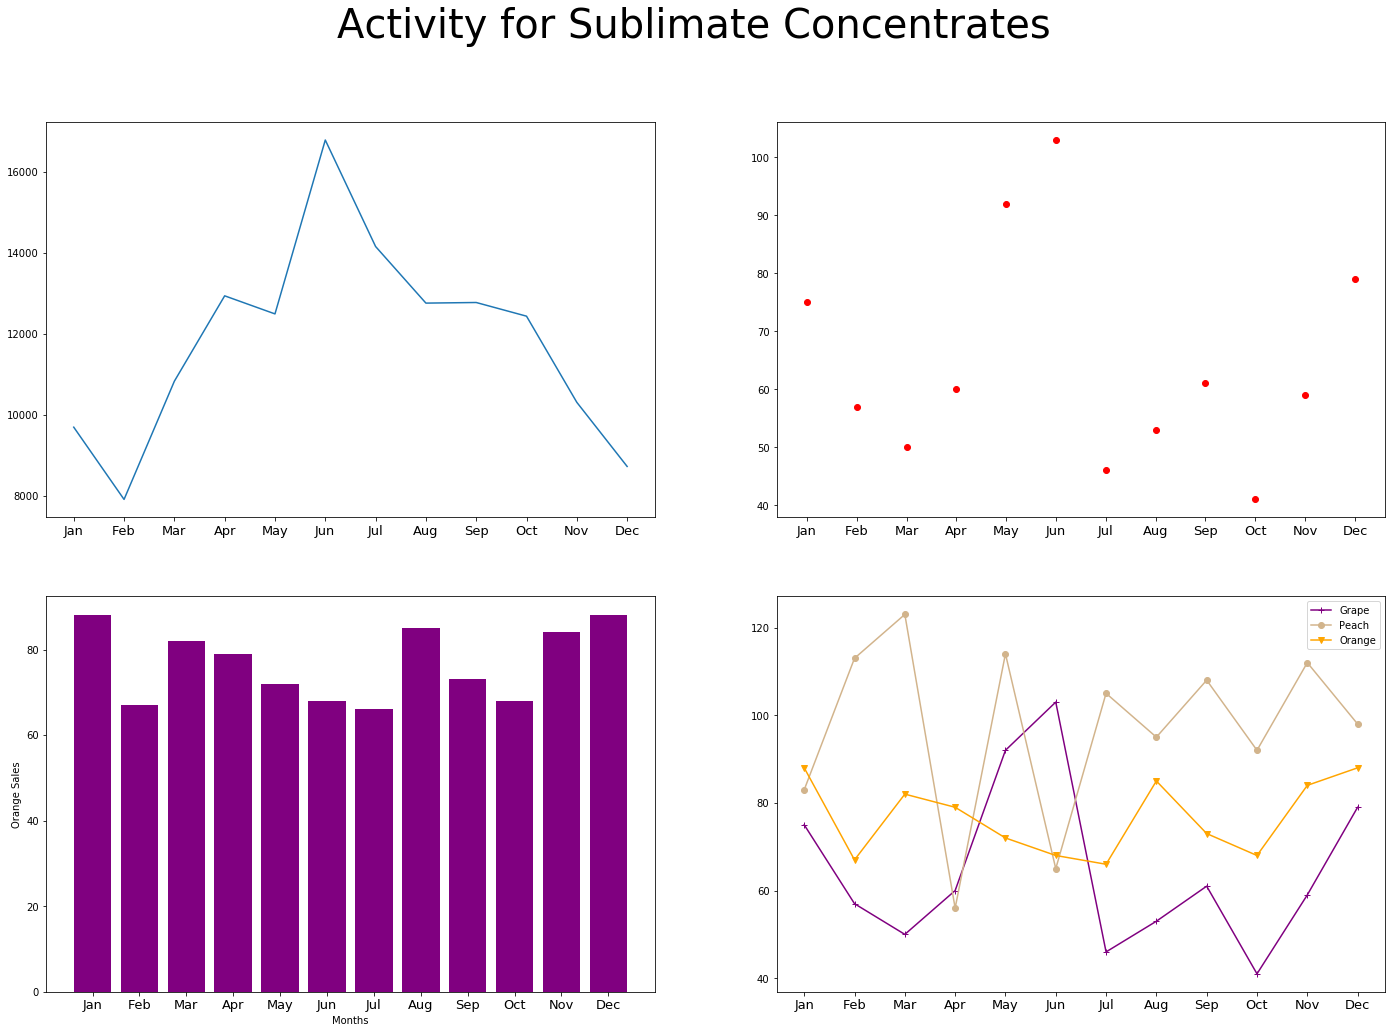

In [6]:
#%%pycodestyle

# Begin with pyplot methods:
plt.figure(figsize=(24, 16))
plt.suptitle("Activity for Sublimate Concentrates",
             fontsize=40)

# The project also calls for clean margins:
plt.margins(0.2)

# Define an ax variable from subplot:
ax1 = plt.subplot(2, 2, 1)
ax1.set_xticks(month_ints)
ax1.set_xticklabels(months, size=13)

# Make a basic plot with the ax variable:
ax1.plot(month_ints, visits_per_month)

# Define the next axes variable by incrementing the index argument:
ax2 = plt.subplot(2, 2, 2)

# We can call the same xtick settings each time to keep it clean
ax2.set_xticks(month_ints)
ax2.set_xticklabels(months, size=13)

# This time how about a scatterplot?
ax2.scatter(month_ints, grape_per_month, color='red')

# For the third how about a bar chart?
ax3 = plt.subplot(2, 2, 3)
ax3.set_xticks(month_ints)
ax3.set_xticklabels(months, size=13)

# Let's also give it more labels.
# Note that the method is different from our usual plt.xlabel
ax3.set_ylabel("Orange Sales")
ax3.set_xlabel("Months")

ax3.bar(month_ints, orange_per_month, color='purple')

# For this last one let's try something different:
# Start the same way..
ax4 = plt.subplot(2, 2, 4)
ax4.set_xticks(month_ints)
ax4.set_xticklabels(months, size=13)

# Now, let's plot all the lists in the same ax:
ax4.plot(month_ints, grape_per_month, color='purple', marker="+")
ax4.plot(month_ints, peach_per_month, color='tan', marker="o")
ax4.plot(month_ints, orange_per_month, color='orange', marker="v")

# We can also give the ax a legend very simply:
ax4.legend(['Grape', 'Peach',
           'Orange'])

plt.savefig('./pic.png')